In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import csv
import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt
from __future__ import print_function

In [2]:
threshold = 0.586366150792    

In [3]:
#print(os.listdir('D:\study\major project\scl\preprocessed\pitchdata'))
max_row=0;
name=""
pitch=""
i=0;
full_data=[]
j=0;
padding=[]
location='D:\study\major project\scl\preprocessed\pitchdata\\'
paddf=pd.DataFrame({'st0':[0],'st1':[0],'st2':[0],'st3':[0],'st4':[0],'st5':[0],'st6':[0],'st7':[0],'st8':[0],'st9':[0],'st10':[0],'st11':[0],})
for fname in os.listdir('D:\study\major project\scl\preprocessed\pitchdata'):
    data=pd.read_csv(location+fname);
    length=len(data)
    temp=np.asarray(data)
    count=8420-length
    p=[[0]*12]*count
    padding=np.asarray(p)
    temp=np.concatenate([temp,padding])
    temp1=np.reshape(temp,12*8420)
    full_data.append(temp1)
    j=j+1
    if j%100==0:
        print(j)
#print(len(full_data))
print("done")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
done


In [4]:
Y=[]
pth1= 'D:\\study\\major project\\scl\\preprocessed\\pitchdata'
pth2 = 'D:\\study\\major project\\scl\\preprocessed\\metadata'
os.chdir(pth1)
for fname in os.listdir():
    with open(pth2+"\\"+fname, newline='') as csvf:
        reader = csv.DictReader(csvf)
        for row in reader:
            if float(row['song_hotttnesss']) > threshold:
                Y = np.append(Y, [1])
            else:
                Y = np.append(Y, [0])
print(len(Y))                

4214


In [5]:
#print(temp1.shape[0])
#no,yes
temp_y=[]
for l in Y:
    p=[]
    if l==1:
        p=[0,1]
    else:
        p=[1,0]
    temp_y.append(p)
#print(temp_y)    
Y=temp_y
print(Y[0])

[0, 1]


In [1]:
X_test=[]
X_train=[]
Y_train=[]
Y_test=[]
i=0
for label in Y:
    if i<3000:
        Y_train.append(label)
    else:
        Y_test.append(label)
    i+=1
i=0
for row in full_data:
    if i<3000:
        X_train.append(row)
    else:
        X_test.append(row)
    i+=1   
print(type(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))
print(Y_train[0])
print(Y_test[0])

NameError: name 'Y' is not defined

In [7]:
batch_size = 128
num_classes = 2
epochs = 10

# input image dimensions

img_x, img_y = 12, 8420


In [8]:
#list to numpy array conversion
x_train=np.asarray(X_train)
x_test=np.asarray(X_test)
y_train=np.asarray(Y_train)
y_test=np.asarray(Y_test)
x_train = x_train.reshape(x_train.shape[0], img_y, img_x,1)
x_test = x_test.reshape(x_test.shape[0], img_y, img_x,1)
input_shape = (img_y, img_x,1)

In [9]:
print(x_train.shape)
print(y_train)

(3000, 8420, 12, 1)
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


(None, 8420, 1, 64)
(None, 4210, 1, 64)
(None, 4210, 1, 64)
(None, 134720)
(None, 1024)
(None, 2)
Train on 3000 samples, validate on 1214 samples
Epoch 1/10
3000/3000 [==============================] - 142s 47ms/step - loss: 0.8106 - acc: 0.6470 - val_loss: 0.5716 - val_acc: 0.7488
Epoch 2/10
3000/3000 [==============================] - 132s 44ms/step - loss: 0.5634 - acc: 0.7503 - val_loss: 0.5696 - val_acc: 0.7488
Epoch 3/10
3000/3000 [==============================] - 146s 49ms/step - loss: 0.5621 - acc: 0.7503 - val_loss: 0.5647 - val_acc: 0.7488
Epoch 4/10
3000/3000 [==============================] - 147s 49ms/step - loss: 0.5617 - acc: 0.7503 - val_loss: 0.5653 - val_acc: 0.7488
Epoch 5/10
3000/3000 [==============================] - 139s 46ms/step - loss: 0.5582 - acc: 0.7503 - val_loss: 0.5626 - val_acc: 0.7488
Epoch 6/10
3000/3000 [==============================] - 133s 44ms/step - loss: 0.5571 - acc: 0.7503 - val_loss: 0.5613 - val_acc: 0.7488
Epoch 7/10
3000/3000 [==========

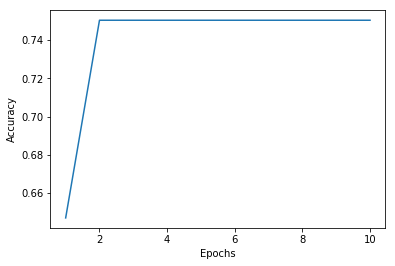

In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 12), strides=(1, 12),

                 activation='relu',
                 padding='same',

                 input_shape=input_shape,
                data_format='channels_last'))

print(model.output_shape)
model.add(MaxPooling2D(pool_size=(2,1),strides=(2,1)))
print(model.output_shape)
model.add(Conv2D(64, kernel_size=(3, 1), strides=(1, 1),

                 activation='relu',
                 padding='same',

                 input_shape=input_shape,
                data_format='channels_last'))

print(model.output_shape)
model.add(MaxPooling2D(pool_size=(2,1),strides=(2,1)))

model.add(Flatten())
print(model.output_shape)
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
print(model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print(model.output_shape)
model.compile(loss=keras.losses.categorical_crossentropy,

              optimizer=keras.optimizers.Adam(),

              metrics=['accuracy'])





class AccuracyHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):

        self.acc = []



    def on_epoch_end(self, batch, logs={}):

        self.acc.append(logs.get('acc'))



history = AccuracyHistory()



model.fit(x_train, y_train,

          batch_size=batch_size,

          epochs=epochs,

          verbose=1,

          validation_data=(x_test, y_test),

          callbacks=[history])

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

plt.plot(range(1, 11), history.acc)

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.show()    